Algorytm do analizy skupien (ang. Clustering) k-średnich


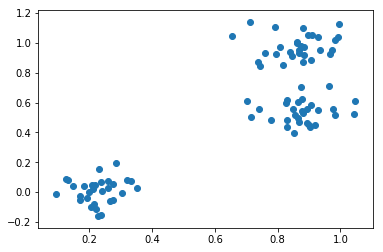

In [1]:
#zacznijmy od wygenerowania danych wejściowych

import numpy as np
import matplotlib.pyplot as plt

#ustalmy stale losowanie
np.random.seed(8)

#wylosujmy środki losowanych grup (k=3)
centrs = np.random.rand(3,2)


std = 0.07
num = 30

#wylosujmy zbior punktow z rozkladu normalnego
P = np.vstack([
    np.random.normal(centrs[0], [std, std], (30, 2)),
    np.random.normal(centrs[1], [std, std], (30, 2)),
    np.random.normal(centrs[2], [std, std], (30, 2)),
                 ])

plt.scatter(P.T[0], P.T[1])
plt.show()

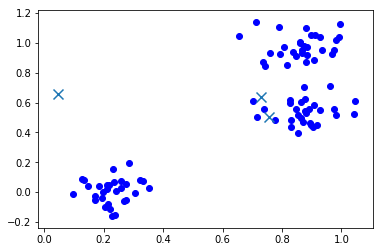

In [2]:
#tutaj zaczyna sie implementacja algorytmu k-średnich
#w kroku inicjalizacji wybieramy losowo k-centroidów

k = 3 
C = np.random.rand(k, 2)

#i narysujmy je
plt.scatter(P.T[0], P.T[1], c = 'b')
plt.scatter(C.T[0], C.T[1], s=100, marker='x')
plt.show()

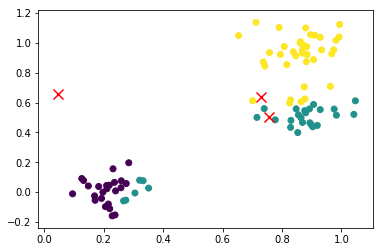

In [3]:
#algorytm jest iteracyjny i sklada sie z dwoch krokow
from scipy.spatial import distance #pakiet do obliczen odleglosci

#krok 1. przypisanie ()
s2id = np.zeros(len(P)) #wektory przypisujacy indeks probki -> indeks centroidu (grupy)
for i, s_i in enumerate(P):
    dists = []
    for c_i in C:
        dists.append(distance.euclidean(s_i, c_i ))
    s2id[i] = np.argmin(dists) #przypiszmy indeks najblizszego centroidu
    
# i narysujmy
plt.scatter(P.T[0], P.T[1], c = s2id)
plt.scatter(C.T[0], C.T[1], s=100, marker='x', c='r')
plt.show()

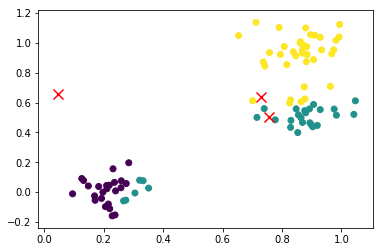

In [4]:
#napiszmy jeszcze raz to samo ale w nieco bardziej zoptymalizowanej formie
#(mozemy zrezygnowac z petli pythona na rzecz wysokoposiomy bibliotek ze scipy i numpy)

 
dists = distance.cdist(P, C, metric='euclidean')
s2id = np.argmin(dists, axis=1) #wykonaj funkcje argmin 'po wierszach' (czyli os numer 1)

plt.scatter(P.T[0], P.T[1], c = s2id)
plt.scatter(C.T[0], C.T[1], s=100, marker='x', c='r')
plt.show()

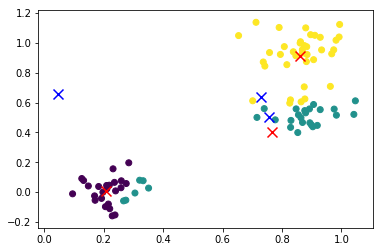

In [5]:
#krok 2 aktualizacja centroidow
# for i in range(len(C)):
C_old = C.copy()
for i in range(len(C)):
    C[i] = np.mean(P[s2id==i], axis=0)
    
plt.scatter(P.T[0], P.T[1], c = s2id)
plt.scatter(C_old.T[0], C_old.T[1], s=100, marker='x', c='b')
plt.scatter(C.T[0], C.T[1], s=100, marker='x', c='r')

plt.show()

srednia odleglosc od centroidow = 0.1288679511059087


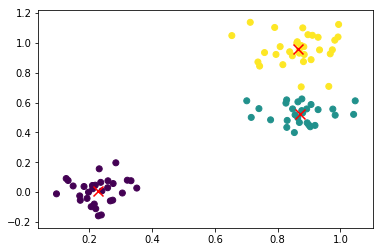

srednia odleglosc od centroidow = 0.09548371406398612


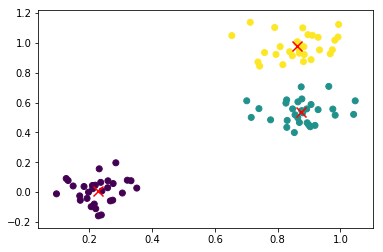

srednia odleglosc od centroidow = 0.09551771753327577


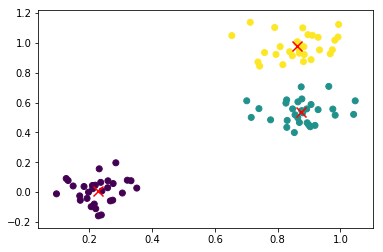

srednia odleglosc od centroidow = 0.09551771753327577


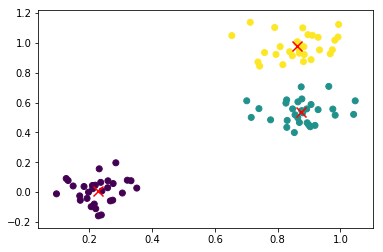

srednia odleglosc od centroidow = 0.09551771753327577


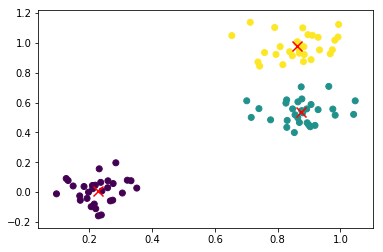

In [6]:
#podsumujmy to oraz uruchommy kilkukrotnie
for x in xrange(5):
    dists = distance.cdist(P, C, metric='euclidean')
    s2id = np.argmin(dists, axis=1) 
    print "srednia odleglosc od centroidow =", np.mean(np.min(dists, axis=1))
    
    for i in range(len(C)):
        C[i] = np.mean(P[s2id==i], axis=0)

    plt.scatter(P.T[0], P.T[1], c = s2id)
    plt.scatter(C.T[0], C.T[1], s=100, marker='x', c='r')
    plt.show()

In [7]:
#wpiszmy to w funkcje
def kmeans(P, k, max_iters = 100, min_improvement=0.01):
    prev_dist = 0
    
    while True:
        C = np.random.rand(k, 2)    
        dists = distance.cdist(P, C, metric='euclidean')
        s2id = np.argmin(dists, axis=1) 
        if len(np.unique(s2id)) == k:
            break #zadbajmy o to aby kazdy centroid mial przynajmniej jeden 'bliski' punkt danych
    
    
    for x in xrange(max_iters):
        dists = distance.cdist(P, C, metric='euclidean')
        s2id = np.argmin(dists, axis=1) 
        curr_dist = np.mean(np.min(dists, axis=1))
    
        for i in range(len(C)):
            C[i] = np.mean(P[s2id==i], axis=0)
        
        if curr_dist - prev_dist < min_improvement:
            break #jesli nie robimy juz poprawek po co kontyuowac

    return s2id, C

        

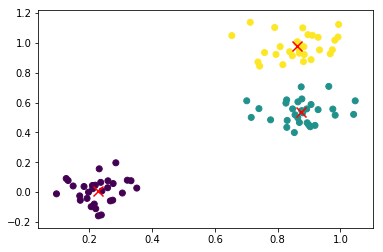

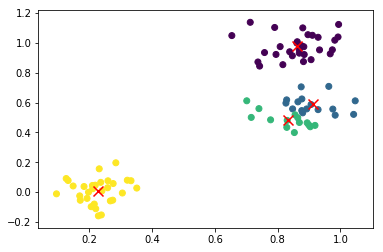

In [9]:
#KMEANS dla k=3

s2id, C = kmeans(P,k=3)
plt.scatter(P.T[0], P.T[1], c = s2id)
plt.scatter(C.T[0], C.T[1], s=100, marker='x', c='r')
plt.show()

#KMEANS dla k=4

s2id, C = kmeans(P,k=4)
plt.scatter(P.T[0], P.T[1], c = s2id)
plt.scatter(C.T[0], C.T[1], s=100, marker='x', c='r')
plt.show()